In [2]:
# Package imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import pandas as pd
from functools import reduce

In [3]:
# The files are read from the below address
NFLX=pd.read_csv("C:/Users/shahsh/NFLX.csv")

# The below depicts first few rows of the data imported
NFLX.head()

,Date,Open Netflix,High Netflix,Low Netflix,Close Netflix,Adj Close Netflix,Volume Netflix
0,02/01/2019,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,03/01/2019,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,04/01/2019,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,07/01/2019,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,08/01/2019,319.980011,320.589996,308.010010,320.269989,320.269989,15359200


In [4]:
# The columns are named as per the Stock for ease but can be changed using the below command (shown for Diney below)
NFLX.rename(columns={'Close': 'Close-NFLX', }, inplace=True)
# Viewing the dataset after above.
NFLX.head()

,Date,Open Netflix,High Netflix,Low Netflix,Close Netflix,Adj Close Netflix,Volume Netflix
0,02/01/2019,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,03/01/2019,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,04/01/2019,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,07/01/2019,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,08/01/2019,319.980011,320.589996,308.010010,320.269989,320.269989,15359200


In [5]:
# Reviewing datatypes after above command
NFLX.dtypes

Date                  object
Open Netflix         float64
High Netflix         float64
Low Netflix          float64
Close Netflix        float64
Adj Close Netflix    float64
Volume Netflix         int64
dtype: object

In [6]:
# Index (Date) is now set as a Datetime datatype in the NFLX file
NFLX['Date'] = pd.to_datetime(NFLX['Date'])
NFLX


,Date,Open Netflix,High Netflix,Low Netflix,Close Netflix,Adj Close Netflix,Volume Netflix
0,2019-02-01,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,2019-03-01,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,2019-04-01,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,2019-07-01,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,2019-08-01,319.980011,320.589996,308.010010,320.269989,320.269989,15359200
...,...,...,...,...,...,...,...
858,2022-05-27,193.190002,195.250000,190.369995,195.190002,195.190002,8586000
859,2022-05-31,196.179993,199.949997,190.800003,197.440002,197.440002,11398500
860,2022-01-06,198.699997,202.740005,191.660004,192.910004,192.910004,8416200
861,2022-02-06,192.020004,205.470001,191.720001,205.089996,205.089996,9623100


In [7]:
# Checking if there are any null values in the dataset 
NFLX.isnull().sum()

Date                 0
Open Netflix         0
High Netflix         0
Low Netflix          0
Close Netflix        0
Adj Close Netflix    0
Volume Netflix       0
dtype: int64

In [8]:
# Removing Duplicates 
NFLX.drop_duplicates(keep=False,inplace=True)

In [9]:
# The below command will replace all null values with future day`s value to avoid any gaps
NFLX.fillna(method='ffill', inplace=True)

In [10]:
NFLX.isnull().sum()

Date                 0
Open Netflix         0
High Netflix         0
Low Netflix          0
Close Netflix        0
Adj Close Netflix    0
Volume Netflix       0
dtype: int64

In [11]:
# Reading the dataset after the above command
NFLX.head()

,Date,Open Netflix,High Netflix,Low Netflix,Close Netflix,Adj Close Netflix,Volume Netflix
0,2019-02-01,259.279999,269.750000,256.579987,267.660004,267.660004,11679500
1,2019-03-01,270.200012,275.790009,264.429993,271.200012,271.200012,14969600
2,2019-04-01,281.880005,297.799988,278.540009,297.570007,297.570007,19330100
3,2019-07-01,302.100006,316.799988,301.649994,315.339996,315.339996,18620100
4,2019-08-01,319.980011,320.589996,308.010010,320.269989,320.269989,15359200


In [12]:
#Import the data for Disney - stock 2
DSNY = pd.read_csv('C:/Users/shahsh/Disney.csv')
# As above, renaming the close price column to ensure further analysis is easier.
DSNY.rename(columns={'Close Disney': 'Close-DSNY', }, inplace=True)
DSNY['Date'] = pd.to_datetime(DSNY['Date'])
DSNY.head()

,Date,Open Disney,High Disney,Low Disney,Close-DSNY,Adj Close Disney,Volume Disney
0,2019-02-01,108.099998,109.139999,107.730003,108.970001,107.654343,9723500
1,2019-03-01,108.480003,108.650002,105.940002,106.330002,105.046211,10594700
2,2019-04-01,107.940002,110.750000,107.250000,109.610001,108.286606,10122800
3,2019-07-01,109.910004,111.400002,109.300003,110.559998,109.225136,6714700
4,2019-08-01,111.800003,112.559998,111.169998,111.419998,110.074753,8730700


In [14]:
# The below will ensure correct timeline for plotting
DSNY.set_index('Date',inplace=True)
NFLX.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

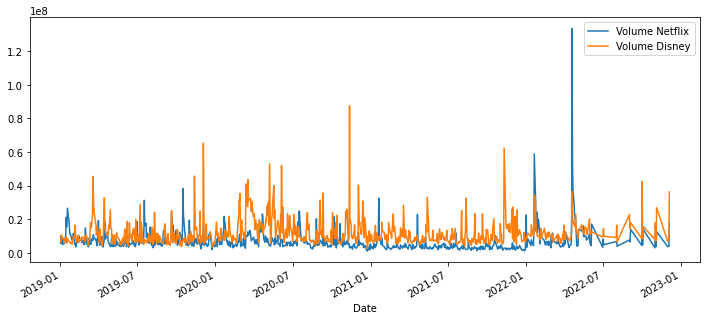

In [15]:
# Plotting both the stocks Volume for 3 years
NFLX['Volume Netflix'].plot(legend=True,figsize=(12,5),xlabel='Date')
DSNY['Volume Disney'].plot(legend=True,figsize=(12,5),xlabel='Date')

In [85]:
DSNY.isnull().sum()

Date                0
Open Disney         0
High Disney         0
Low Disney          0
Close-DSNY          0
Adj Close Disney    0
Volume Disney       0
dtype: int64

In [86]:
# Replacing Null values with nearest value after it
DSNY.fillna(method='ffill', inplace=True)
DSNY.isnull().sum()

Date                0
Open Disney         0
High Disney         0
Low Disney          0
Close-DSNY          0
Adj Close Disney    0
Volume Disney       0
dtype: int64

In [87]:
# The below will change the CP to float for plotting
DSNY['Close-DSNY'] = DSNY['Close-DSNY'].astype('float')
DSNY['Close-DSNY'].fillna(method='ffill', inplace=True)
DSNY.head()

,Date,Open Disney,High Disney,Low Disney,Close-DSNY,Adj Close Disney,Volume Disney
0,2019-02-01,108.099998,109.139999,107.730003,108.970001,107.654343,9723500
1,2019-03-01,108.480003,108.650002,105.940002,106.330002,105.046211,10594700
2,2019-04-01,107.940002,110.750000,107.250000,109.610001,108.286606,10122800
3,2019-07-01,109.910004,111.400002,109.300003,110.559998,109.225136,6714700
4,2019-08-01,111.800003,112.559998,111.169998,111.419998,110.074753,8730700


In [88]:
# Double check if there are any gaps in values
DSNY.isnull().sum()

Date                0
Open Disney         0
High Disney         0
Low Disney          0
Close-DSNY          0
Adj Close Disney    0
Volume Disney       0
dtype: int64

In [89]:
# Check the data types and update as required
DSNY.dtypes

Date                datetime64[ns]
Open Disney                float64
High Disney                float64
Low Disney                 float64
Close-DSNY                 float64
Adj Close Disney           float64
Volume Disney                int64
dtype: object

In [90]:
#Change the closing price to float for graphs
DSNY.set_index('Date')
DSNY['Close-DSNY'] = DSNY['Close-DSNY'].astype('float')

In [91]:
NFLX.drop(labels=["Open Netflix","High Netflix","Low Netflix","Adj Close Netflix","Volume Netflix"],axis=1,inplace=True)
DSNY.drop(labels=["Open Disney","High Disney","Low Disney","Adj Close Disney","Volume Disney"],axis=1,inplace=True)
# Merging Datasets to plot only Closing price for both Stocks
df_merged = NFLX.merge(DSNY,how='left', left_on='Date', right_on='Date')
df_merged

,Date,Close Netflix,Close-DSNY
0,2019-02-01,267.660004,108.970001
1,2019-03-01,271.200012,106.330002
2,2019-04-01,297.570007,109.610001
3,2019-07-01,315.339996,110.559998
4,2019-08-01,320.269989,111.419998
...,...,...,...
858,2022-05-27,195.190002,109.320000
859,2022-05-31,197.440002,110.440002
860,2022-01-06,192.910004,109.190002
861,2022-02-06,205.089996,110.870003


In [92]:
# Double check there are no null values are present
df_merged.dtypes


Date             datetime64[ns]
Close Netflix           float64
Close-DSNY              float64
dtype: object

In [93]:
# Double check there are no null values are present
df_merged.isnull().sum()

Date             0
Close Netflix    0
Close-DSNY       0
dtype: int64

In [94]:
#Creatng a dataset naming convention
df=df_merged
df_merged.dropna(how='all',inplace=True)

In [95]:
#Set index to date on the Dataset
df.set_index('Date')

,Close Netflix,Close-DSNY
Date,,
2019-02-01,267.660004,108.970001
2019-03-01,271.200012,106.330002
2019-04-01,297.570007,109.610001
2019-07-01,315.339996,110.559998
2019-08-01,320.269989,111.419998
...,...,...
2022-05-27,195.190002,109.320000
2022-05-31,197.440002,110.440002
2022-01-06,192.910004,109.190002


<AxesSubplot:xlabel='Date'>

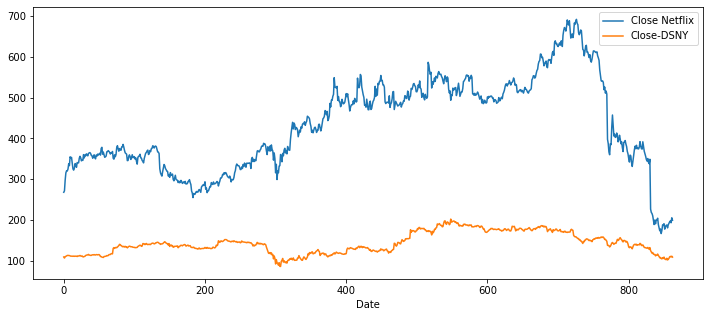

In [108]:
#Plotting the closing price for both Stocks
NFLX['Close Netflix'].plot(legend=True,figsize=(12,5),xlabel='Date')
DSNY['Close-DSNY'].plot(legend=True,figsize=(12,5),xlabel='Date')

In [96]:
df
df.dtypes

Date             datetime64[ns]
Close Netflix           float64
Close-DSNY              float64
dtype: object

In [69]:
# Creating a new column with adjusted (reduced) close price so that the data for both stocks is comparable
NFLX['ADJ Close Netflix 2'] = NFLX['Adj Close Netflix'] *0.5

In [70]:
NFLX.head()

,Date,Open Netflix,High Netflix,Low Netflix,Close Netflix,Adj Close Netflix,Volume Netflix,ADJ Close Netflix 2
0,2019-02-01,259.279999,269.750000,256.579987,267.660004,267.660004,11679500,133.830002
1,2019-03-01,270.200012,275.790009,264.429993,271.200012,271.200012,14969600,135.600006
2,2019-04-01,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,148.785003
3,2019-07-01,302.100006,316.799988,301.649994,315.339996,315.339996,18620100,157.669998
4,2019-08-01,319.980011,320.589996,308.010010,320.269989,320.269989,15359200,160.134995


In [71]:
DSNY.set_index('Date',inplace=True)
NFLX.set_index('Date',inplace=True)


<AxesSubplot:xlabel='Date'>

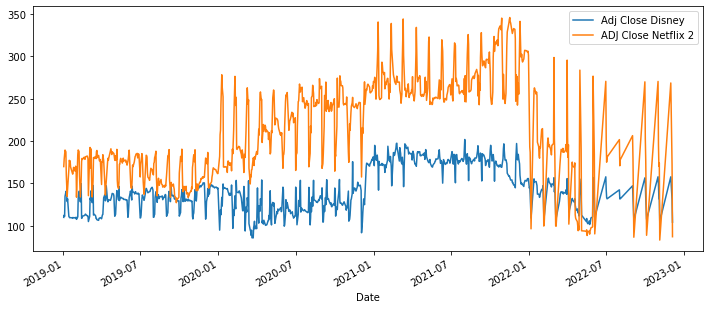

In [72]:
# Plotting ADJ Close price for both Stocks
DSNY['Adj Close Disney'].plot(legend=True,figsize=(12,5),xlabel='Date')
NFLX['ADJ Close Netflix 2'].plot(legend=True,figsize=(12,5),xlabel='Date')

In [103]:
mod_df = df.dropna( axis=0, 
                    how='any')

Text(0.5, 1.0, 'Analaysis: Relationship between Netflix and Disney Share price')

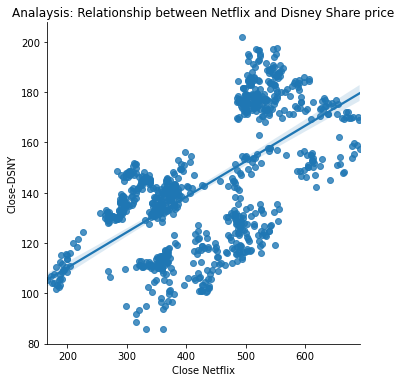

In [111]:
# Relationship between Netflix and Disney Closing price.
sns.lmplot(x='Close Netflix',y='Close-DSNY',data=mod_df)
plt.xlabel('Close Netflix')
plt.ylabel('Close-DSNY')
plt.title('Analaysis: Relationship between Netflix and Disney Share price')

In [112]:
# Importing AMC Stock for compariso
AMC=pd.read_csv("C:/Users/shahsh/AMC.csv")
AMC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,12.01,13.08,11.90,12.89,11.914325,1374900
1,2019-01-03,12.80,13.54,12.63,13.06,12.071457,1392400
2,2019-01-04,13.22,13.69,13.02,13.54,12.515124,1025000
3,2019-01-07,13.55,14.26,13.37,14.12,13.051222,1119200
4,2019-01-08,14.21,14.70,14.09,14.57,13.467159,1122700


In [114]:
DSNY.set_index('Date',inplace=True)
NFLX.set_index('Date',inplace=True)
AMC.set_index('Date',inplace=True)

<AxesSubplot:xlabel='Date'>

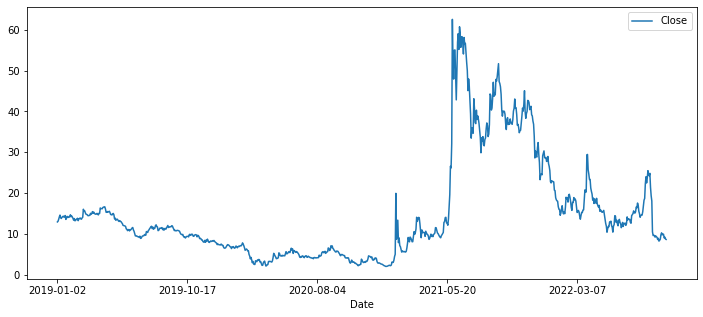

In [116]:
# Plotting AMC Closing price for the same timeline
AMC['Close'].plot(legend=True,figsize=(12,5),xlabel='Date')
